In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from nltk.tag import tnt
from nltk.corpus import indian
import string
import re
from googletrans import Translator
from nltk.tree import Tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
data_folder = os.path.join(os.getcwd(),'/content/drive/MyDrive/input')
train_text = list()
for root,folders,files in os.walk(data_folder):
  for file in files:
    path=os.path.join(root,file)
    with open(path) as inf:
      txt = ""
      for line in inf:
        if not line.strip():
          continue
        d = line.strip()
        txt += d
      train_text.append(txt)
train_df = pd.DataFrame()
train_df["Text"] = train_text
train_df.to_csv('Dataset.csv', index=False)
train_df= pd.read_csv("Dataset.csv")
train_df.head(5)

,Text
0,विटीफीड एक इंटरनेट मीडिया और सूचना-सामग्री प्र...
1,"ज़ागान, पश्चिमी पोलैंड में एक शहर है। यह शहर ब..."
2,ज्योतिष शास्त्र के माध्यम से जीवन की बारीक से ...
3,बौनी गैलेक्सी ऐसी गैलेक्सी को कहते हैं जिसमें ...
4,सतपुड़ा राष्ट्रीय उद्यान भारत के मध्य प्रदेश र...


In [ ]:
my_punct = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '.', '/', ':', ';', '<', '=', '>', '@', '[', '\\', ']', '^', '_', '`', '{', '}', '~', '»', '«', '“', '”',"|","-"]
for i in range(len(train_df)):
  txt = train_df._get_value(i, 'Text')
  
  punct_pattern = re.compile("[" + re.escape("".join(my_punct)) + "]") 
  train_df.at[i,'Text']=  re.sub(punct_pattern, "", txt)

train = train_df
train_df.head(5)



,Text
0,विटीफीड एक इंटरनेट मीडिया और सूचनासामग्री प्रद...
1,ज़ागान पश्चिमी पोलैंड में एक शहर है। यह शहर बो...
2,ज्योतिष शास्त्र के माध्यम से जीवन की बारीक से ...
3,बौनी गैलेक्सी ऐसी गैलेक्सी को कहते हैं जिसमें ...
4,सतपुड़ा राष्ट्रीय उद्यान भारत के मध्य प्रदेश र...


In [ ]:

def hindi_model():
    train_data = indian.tagged_sents('hindi.pos')
    tnt_pos_tagger = tnt.TnT()
    tnt_pos_tagger.train(train_data)
    return tnt_pos_tagger

model = hindi_model()
for text in train_df["Text"]:  
  tagged = (model.tag(nltk.word_tokenize(text)))
  print(set(tagged))
  print(" ")

#print(model.evaluate())

{('निवारण', 'Unk'), ('चमारिया', 'Unk'), ('मलिक', 'Unk'), ('सूचनासामग्री', 'Unk'), ('पंचायती', 'Unk'), ('स्पेनी', 'Unk'), ('सिंघल', 'Unk'), ('युवाओ', 'Unk'), ('पेयजल', 'Unk'), ('कंपनी', 'Unk'), ('लाने', 'Unk'), ('वर्ष', 'NN'), ('अपूर्व', 'Unk'), ('पैसे', 'Unk'), ('करवाता', 'Unk'), ('कमा', 'Unk'), ('साझेदारी', 'Unk'), ('अभियान', 'Unk'), ('ग्रामीण', 'NNC'), ('का', 'PREP'), ('कम्पनी', 'Unk'), ('इत्यादि', 'Unk'), ('वैश्विक', 'Unk'), ('शशांक', 'Unk'), ('प्रदाता', 'Unk'), ('कंटेंट', 'Unk'), ('इंदौर', 'Unk'), ('कि', 'CC'), ('170', 'Unk'), ('और', 'CC'), ('की', 'PREP'), ('दूसरी', 'QFNUM'), ('नौकरियां', 'Unk'), ('स्टार्टअप', 'Unk'), ('100', 'Unk'), ('मंच', 'Unk'), ('समाचार', 'Unk'), ('प्रकाशित', 'Unk'), ('रहे', 'VAUX'), ('2016', 'Unk'), ('जिसमें', 'PRP'), ('इंटरनेट', 'Unk'), ('प्रवीण', 'Unk'), ('सबसे', 'INTF'), ('पा', 'Unk'), ('सोहेल', 'Unk'), ('बतौर', 'Unk'), ('पंजीकृत', 'Unk'), ('यूट्यूब', 'Unk'), ('राशि', 'Unk'), ('मध्य', 'JJ'), ('ब्लॉगर्स', 'Unk'), ('यूनिवर्सिटी', 'NNP'), ('40', 'Unk'), ('रित

In [ ]:
for i in range(0,len(tagged)):
  if tagged[i][1] == "PREP":
    print(tagged[i][0])

की
की
का
का
में
के
में
के
पर
में
का
के
को
में
के
में


In [ ]:
# Let's remove the stop words 
from spacy.lang.hi import Hindi
nlp = Hindi()
stopremove=[]
stop_words=[]
def remove(doc):
  not_stop_words = []
  for token in doc:
    if token.is_stop:
      stop_words.append(token.text)
      continue
    if token.is_punct or token.text =="।":
      stop_words.append(token.text)
      continue 
    not_stop_words.append(token.text)
  stopremove.append(not_stop_words)

for i in train_df['Text']:
  doc = nlp(i)
  remove(doc)
for i in stopremove:
  print(i)


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


['विटीफीड', 'इंटरनेट', 'मीडिया', 'सूचनासामग्री', 'प्रदाता', 'कम्पनी', 'आरम्भ', '2014', 'इन्दौर', 'शुरू', 'सम्प्रति', '100', 'कर्मचारी', 'आवागमन', 'दृष्टी', 'विश्व', 'दूसरी', 'भारत', 'पहली', 'बड़ी', 'वाइरल', 'कन्टेन्ट', 'कम्पनी', 'सम्प्रति', 'अंग्रेजी', 'हिन्दी', 'स्पेनी', 'भाषाओं', 'सामग्री', 'उपलब्ध', 'करा', 'रही', 'समाचार', 'खेल', 'फैशन', 'लाइफ', 'स्टाइल', 'यात्रा', 'प्रेरणा', 'स्वास्थ्य', 'सम्बंधित', 'श्रेणियों', 'सामग्री', 'प्रकाशित', 'करती', 'हैं।विटीफीड', 'विभिन्न्', 'विषयों', 'लिखने', 'लेखकों', 'ऑनलाइन', 'प्लेटफॉर्म', 'उपलब्ध', 'करवाता', 'यूट्यूब', 'भांति', 'पंजीकृत', 'उपयोगकर्ताओं', 'मूल', 'सामग्री', 'वेबसाइट', 'पोस्ट', 'अनुमति', 'देता', 'पोस्ट', 'अर्जित', 'ट्रैफिक', 'अनुसार', 'उपयोगकर्ता', 'राशि', 'भुगतान', 'मई', '2017', 'विटीफीड', 'वैश्विक', 'अलेक्सा', 'रेटिंग', '170', 'भारत', '18', 'हैं।विटीफीड', 'वर्ष', '2014', 'विनय', 'सिंघल', 'प्रवीण', 'सिंघल', 'शशांक', 'वैष्णव', 'स्थापित', 'वत्साना', 'टेक्नोलॉजीस', 'नामक', 'टेक', 'कंपनी', 'अंतर्गत', 'संचालित', 'मुख्यालय', 'इंदौर', 'मध्य'

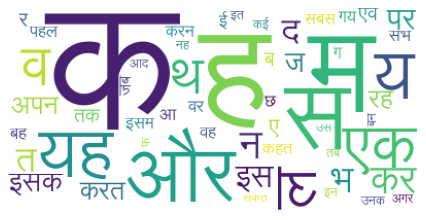

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
text2 = " ".join(title for title in stop_words)
wordcloud = WordCloud(font_path="/content/drive/MyDrive/Lohit-Devanagari.ttf",collocations = False, background_color = 'white').generate(text2)
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 1)
plt.show()


In [ ]:
def get_keywords(pos):
    grammar = r"""NP:{<NN.*>}"""
    #grammar = r"""NP:{<DT>?<JJ>*<NN>}"""
    chunkParser = nltk.RegexpParser(grammar)
    chunked = chunkParser.parse(pos)
    continuous_chunk = set()
    current_chunk = []
    for i in chunked:
        if type(i) == Tree:
            current_chunk.append(" ".join([token for token, pos in i.leaves()]))
        elif current_chunk:
            named_entity = " ".join(current_chunk)
            if named_entity not in continuous_chunk:
                continuous_chunk.add(named_entity)
                current_chunk = []
            else:
                continue
    return (continuous_chunk)


tags=[]

for i in stopremove:
  model = hindi_model()
  new_tagged = (model.tag(i))
  tags.append(new_tagged)
  print(set(new_tagged))
  print()
  print("====KEYWORDS===")
  print(get_keywords(new_tagged))
  print("\n")
  

{('निवारण', 'Unk'), ('चमारिया', 'Unk'), ('सूचनासामग्री', 'Unk'), ('पंचायती', 'Unk'), ('स्पेनी', 'Unk'), ('सिंघल', 'Unk'), ('युवाओ', 'Unk'), ('पेयजल', 'Unk'), ('कंपनी', 'Unk'), ('वर्ष', 'NN'), ('अपूर्व', 'Unk'), ('पैसे', 'Unk'), ('करवाता', 'Unk'), ('कमा', 'Unk'), ('साझेदारी', 'Unk'), ('अभियान', 'Unk'), ('ग्रामीण', 'NNC'), ('शशांक', 'Unk'), ('कम्पनी', 'Unk'), ('वैश्विक', 'Unk'), ('कंटेंट', 'Unk'), ('प्रदाता', 'Unk'), ('स्टार्टअप', 'Unk'), ('इंदौर', 'Unk'), ('चंद्रशेखरन', 'Unk'), ('170', 'Unk'), ('दूसरी', 'QFNUM'), ('नौकरियां', 'Unk'), ('मंच', 'Unk'), ('अज्ञात', 'Unk'), ('100', 'Unk'), ('समाचार', 'Unk'), ('प्रकाशित', 'Unk'), ('लिया', 'VAUX'), ('2016', 'Unk'), ('जिसमें', 'PRP'), ('इंटरनेट', 'Unk'), ('प्रवीण', 'Unk'), ('पा', 'Unk'), ('सोहेल', 'Unk'), ('बतौर', 'Unk'), ('पंजीकृत', 'Unk'), ('यूट्यूब', 'Unk'), ('राशि', 'Unk'), ('मध्य', 'JJ'), ('ब्लॉगर्स', 'Unk'), ('यूनिवर्सिटी', 'NNP'), ('40', 'Unk'), ('रितेश', 'Unk'), ('आनंद', 'Unk'), ('उपलब्ध', 'JVB'), ('कल्चर', 'Unk'), ('प्रीसीरीज़', 'Unk'),

In [ ]:
translator = Translator()
sentence_id = 0

model_path = "/content/hindi.pos" 

def train_hindi_model(model_path):
    train_data = indian.tagged_sents(model_path)
    tnt_pos_tagger = tnt.TnT()
    tnt_pos_tagger.train(train_data)
    return tnt_pos_tagger


def get_sentId(model_path):
    ids = re.compile('<Sentence\sid=\d+>')
    with open(model_path, "r+") as temp_f:
        content = temp_f.readlines()
        for i in content:
            id_found = (ids.findall(i))
            if id_found:
                id_found = str(id_found).replace("['<Sentence id=", "").replace(">']", "")
                id = int(id_found)
    id = id + 1
    return id


def tag_words(model,text):
    tagged = (model.tag(nltk.word_tokenize(text)))
    return tagged


def handle_UNK(tagged_words, model_path, sentence_id):
    with open(model_path, "r+") as f1:
        result_list = []
        for nep_word, tag in tagged_words:
            if tag == "Unk":
                x = translator.translate(nep_word)
                if x is not None:
                    str1 = str(x)
                    new_str = str1.split()
                    for j in new_str:
                        if re.search('^text=', j, re.I):
                            word = j.replace("text=", ",").replace(",", "")
                            word = str(word)
                            pos = nltk.tag.pos_tag([word])
                            for en_word, tag in pos:
                                result = nep_word + "_" + (tag) + " "
                                result_list.append(result)

            else:
                result = nep_word + "_" + (tag) + " "
                result_list.append(result)

        writing_word = str("\n<Sentence id=") + str(sentence_id) + ">\n"
        output = writing_word + "".join(result_list) + "\n</Sentence>\n</Corpora>"
        for line in f1.readlines():
            f1.write(line.replace("</Corpora>", ""))
        f1.write(output)



sentence_id = (get_sentId(model_path))
model = train_hindi_model(model_path)
for text in stopremove:
  tagged_words = tag_words(model,' '.join(text))
  handle_UNK(tagged_words,model_path,sentence_id)
  
#retrain the model  
model = train_hindi_model(model_path)
for text in stopremove:
  new_tagged_words =  tag_words(model,' '.join(text))
  print ("=================================New Tagged words=================================\n\n",new_tagged_words,"\n")


=================================New Tagged words=================================

 [('विटीफीड', 'NN'), ('इंटरनेट', 'NN'), ('मीडिया', 'NN'), ('सूचनासामग्री', 'NN'), ('प्रदाता', 'DT'), ('कम्पनी', 'NN'), ('आरम्भ', 'NN'), ('2014', 'CD'), ('इन्दौर', 'NN'), ('शुरू', 'NVB'), ('सम्प्रति', 'RB'), ('100', 'CD'), ('कर्मचारी', 'NN'), ('आवागमन', 'NN'), ('दृष्टी', 'NN'), ('विश्व', 'NN'), ('दूसरी', 'QFNUM'), ('भारत', 'NNP'), ('पहली', 'JJ'), ('बड़ी', 'JJ'), ('वाइरल', 'JJ'), ('कन्टेन्ट', 'NN'), ('कम्पनी', 'NN'), ('सम्प्रति', 'RB'), ('अंग्रेजी', 'JJ'), ('हिन्दी', 'NN'), ('स्पेनी', 'JJ'), ('भाषाओं', 'NNS'), ('सामग्री', 'NN'), ('उपलब्ध', 'JVB'), ('करा', 'VB'), ('रही', 'VAUX'), ('समाचार', 'NN'), ('खेल', 'NN'), ('फैशन', 'NN'), ('लाइफ', 'NN'), ('स्टाइल', 'NN'), ('यात्रा', 'NN'), ('प्रेरणा', 'NN'), ('स्वास्थ्य', 'NNP'), ('सम्बंधित', 'JJ'), ('श्रेणियों', 'NNS'), ('सामग्री', 'NN'), ('प्रकाशित', 'VBN'), ('करती', 'VFM'), ('हैं।विटीफीड', 'NN'), ('विभिन्न्', 'JJ'), ('विषयों', 'NNS'), ('लिखने', 'TO'), ('लेखकों', '

In [ ]:
nlp = Hindi()
stopless=[]
def remove(doc):
  not_stop_words = []
  for token in doc:
    if token.is_stop:
      continue 
    not_stop_words.append(token.text)
  stopless.append(not_stop_words)

r=[]
for i in train['Text']:
  doc = nlp(i)
  remove(doc)
for i in stopless:
  r.append(' '.join(i))

train['Text'] = r

for i in range(len(train)):
  txt = train_df._get_value(i, 'Text')  
  punct_pattern = re.compile("[" + re.escape("".join(my_punct)) + "]") 
  train.at[i,'Text']=  re.sub(punct_pattern, "", txt)

In [ ]:
k=[]
for i in train["Text"]:
  text = i.replace("।",'.')
  k.append(text)
train['Text'] = k
train

,Text
0,विटीफीड इंटरनेट मीडिया सूचनासामग्री प्रदाता कम...
1,ज़ागान पश्चिमी पोलैंड शहर . शहर बोबर नदी किनार...
2,ज्योतिष शास्त्र माध्यम जीवन बारीक बारीक घटना द...
3,बौनी गैलेक्सी ऐसी गैलेक्सी जिसमें चंद अरब तारे...
4,सतपुड़ा राष्ट्रीय उद्यान भारत मध्य प्रदेश राज्...
5,वेदमती शैली छत्तीसगढ़ प्रसिद्ध नृत्यनाट्य पंडव...


In [ ]:
from nltk.tokenize import sent_tokenize
from itertools import repeat
l=[]
fin=[]
for i in train["Text"]:
  l = sent_tokenize(i)
  print(l)
  fin=fin+l
c=1
word=[]
sent=[]
for i in fin:
  p=re.split('; |, |\s|\n',i)
  s=[]
  s.extend(repeat(c,len(p)))
  word=word+p 
  sent=sent+s
  c=c+1
#print(len(word)) 
print(sent)
sentence = pd.DataFrame({'Sentence id': sent, 'Word': word })
#sentence.head()

['विटीफीड इंटरनेट मीडिया सूचनासामग्री प्रदाता कम्पनी .', 'आरम्भ 2014 .', 'इन्दौर शुरू .', 'सम्प्रति 100 कर्मचारी आवागमन दृष्टी विश्व दूसरी भारत पहली बड़ी वाइरल कन्टेन्ट कम्पनी .', 'सम्प्रति अंग्रेजी हिन्दी स्पेनी भाषाओं सामग्री उपलब्ध करा रही .', 'समाचार खेल फैशन लाइफ स्टाइल यात्रा प्रेरणा स्वास्थ्य सम्बंधित श्रेणियों सामग्री प्रकाशित करती हैं.विटीफीड विभिन्न् विषयों लिखने लेखकों ऑनलाइन प्लेटफॉर्म उपलब्ध करवाता .', 'यूट्यूब भांति पंजीकृत उपयोगकर्ताओं मूल सामग्री वेबसाइट पोस्ट अनुमति देता पोस्ट अर्जित ट्रैफिक अनुसार उपयोगकर्ता राशि भुगतान .', 'मई 2017 विटीफीड वैश्विक अलेक्सा रेटिंग 170 भारत 18 हैं.विटीफीड वर्ष 2014 विनय सिंघल प्रवीण सिंघल शशांक वैष्णव स्थापित .', 'वत्साना टेक्नोलॉजीस नामक टेक कंपनी अंतर्गत संचालित .', 'मुख्यालय इंदौर मध्य प्रदेश स्थित हैं.इंजीनियरिंग फर्स्ट इयर हमने फेसबुक पेज बनाया हम कंटेंट पोस्ट .', 'धीरेधीरे हमारा पेज लोगों पंसद आने लगा हमने 40 लाख फॉलोअर्स आंकड़ा पार इससे हम पैसे कमा पा .', 'हमने नौकरी खोजी .', 'इंजीनियरिंग खत्म हमने नौकरियां अनुभव लिया .', 'सोचा ह

In [ ]:
translator = Translator()
token=[]
for i in sentence["Word"]:
   d = translator.translate(i)
   token.append(d.text)
sentence['Transword'] = token
sentence = sentence[sentence.Word != '.']
sentence.head(20)

,Sentence id,Word,Transword
0,1,विटीफीड,vitfeed
1,1,इंटरनेट,Internet
2,1,मीडिया,Media
3,1,सूचनासामग्री,information material
4,1,प्रदाता,the provider
5,1,कम्पनी,Company
7,2,आरम्भ,start
8,2,2014,2014
10,3,इन्दौर,Indore
11,3,शुरू,Start


In [ ]:
token_text = list(sentence["Transword"])
t=[]
for i in range(0,len(token_text)):
  w=token_text[i].split(' ')
  if len(w) > 1:
    token_text[i] = w[1]
print(len(token_text))

926


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
from nltk import pos_tag
from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize
from nltk.chunk import conlltags2tree
from nltk.tree import Tree
from nltk.chunk import conlltags2tree, tree2conlltags
from nltk.tag.stanford import StanfordNERTagger
style.use('fivethirtyeight')

In [ ]:
PATH_TO_JAR='/content/drive/MyDrive/stanford-ner.jar'
PATH_TO_MODEL = '/content/drive/MyDrive/english.all.3class.distsim.crf.ser.gz'

In [ ]:
# Tag tokens with standard NLP BIO tags
# Stanford NER tagger    
def stanford_tagger(token_text):
  st = StanfordNERTagger(model_filename=PATH_TO_MODEL,path_to_jar=PATH_TO_JAR, encoding='utf-8')  
  ne_tagged = st.tag(token_text)
  print(len(ne_tagged))
  return (ne_tagged)

def bio_tagger(ne_tagged):
  #ne_tagged = nltk_tagger(sentence,m,token_text)
  bio_tagged = []
  prev_tag = "O"
  for token, tag in ne_tagged:
    if tag == "O":
      bio_tagged.append((token, tag))
      prev_tag = tag
      continue
    if tag != "O" and prev_tag == "O":
      bio_tagged.append((token, "B-"+tag))
      prev_tag = tag
    elif prev_tag != "O" and prev_tag == tag:
      bio_tagged.append((token, "I-"+tag))
      prev_tag = tag
    elif prev_tag != "O" and prev_tag != tag:
      bio_tagged.append((token, "B-"+tag))
      prev_tag = tag
  return bio_tagged

l = bio_tagger(stanford_tagger(token_text))
print(l)

925
[('vitfeed', 'O'), ('Internet', 'O'), ('Media', 'O'), ('material', 'O'), ('provider', 'O'), ('Company', 'B-ORGANIZATION'), ('start', 'O'), ('2014', 'O'), ('Indore', 'O'), ('Start', 'O'), ('currently', 'O'), ('100', 'O'), ('Staff', 'O'), ('traffic', 'O'), ('vision', 'O'), ('World', 'O'), ('second', 'O'), ('India', 'B-LOCATION'), ('First', 'O'), ('Big', 'O'), ('Viral', 'O'), ('Content', 'O'), ('Company', 'O'), ('currently', 'O'), ('English', 'O'), ('Hindi', 'O'), ('Spanish', 'O'), ('languages', 'O'), ('material', 'O'), ('available', 'O'), ('do', 'O'), ('doing', 'O'), ('news', 'O'), ('Play', 'B-ORGANIZATION'), ('fashion', 'I-ORGANIZATION'), ('Life', 'I-ORGANIZATION'), ('Style', 'I-ORGANIZATION'), ('Travel', 'I-ORGANIZATION'), ('Inspiration', 'I-ORGANIZATION'), ('Health', 'I-ORGANIZATION'), ('related', 'O'), ('categories', 'O'), ('material', 'O'), ('published', 'O'), ('does', 'O'), ('is.vitfeed', 'O'), ('various', 'O'), ('subjects', 'O'), ('write', 'O'), ('writers', 'O'), ('Online', 'O

In [ ]:
tag=[]
for i,j in l:
  tag.append(j)
tag.append('O')
sentence['Tag'] = tag
sentence.head(20)

,Sentence id,Word,Transword,Tag
0,1,विटीफीड,vitfeed,O
1,1,इंटरनेट,Internet,O
2,1,मीडिया,Media,O
3,1,सूचनासामग्री,information material,O
4,1,प्रदाता,the provider,O
5,1,कम्पनी,Company,B-ORGANIZATION
7,2,आरम्भ,start,O
8,2,2014,2014,O
10,3,इन्दौर,Indore,O
11,3,शुरू,Start,O


In [ ]:
sentence.to_csv('taggedData.csv', index=False)

##Numeric feature extraction

In [ ]:
import sys
import math
class SentenceGetter(object):
            
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["Word"].values.tolist(), s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence id").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

def numericFeatures():
    data = pd.read_csv("taggedData.csv")
    data = data.fillna(method="ffill")
    words = list(set(data["Word"].values))
    words.append("ENDPAD")
    tags = list(set(data["Tag"].values))
    print(tags)



    max_len = 50
    word2idx = {w: i for i, w in enumerate(words)}
    tag2idx = {t: i for i, t in enumerate(tags)}
    word2Suff2idx = {w[-2:]: i for i, w in enumerate(words)}
    word3Suff2idx = {w[-3:]: i for i, w in enumerate(words)}
    binaryIdx = {"True": 1, "False": 0}

    getter = SentenceGetter(data)
    # sent = getter.get_next()
    sentences = getter.sentences

    def word2features(sent, i):
        word = sent[i][0]  
        features = {
            'bias': 1.0,
            'word': word2idx[word],
            'word[-3:]': word3Suff2idx[word[-3:]],
            'word[-2:]': word2Suff2idx[word[-2:]],
            'word.isdigit()': binaryIdx[str(word.isdigit())],
            'word.isletter()': binaryIdx[str(bool(re.match("^[\u0900-\u097F]+$",word)))],
            'word.isAlpha()': binaryIdx[str(bool(re.match("^[\u0900-\u097F0-9]+$",word)))],
            'word.Tag': tag2idx[sent[i][1]],
        }
        if i > 0:
            word1 = sent[i-1][0]
            features.update({
                '-1:word': word2idx[word1],
                '-1:word.isdigit()': binaryIdx[str(word1.isdigit())],
                '-1:word.isletter()': binaryIdx[str(bool(re.match("^[\u0900-\u097F]+$",word1)))],
                '-1:word.isAlpha()': binaryIdx[str(bool(re.match("^[\u0900-\u097F0-9]+$",word1)))],
            })
        else:
            features['BOS'] = binaryIdx[str("True")]

        if i < len(sent)-1:
            word1 = sent[i+1][0]
            features.update({
                '+1:word': word2idx[word1],
                '+1:word.isdigit()': binaryIdx[str(word1.isdigit())],
                '+1:word.isletter()': binaryIdx[str(bool(re.match("^[\u0900-\u097F]+$",word1)))],
                '+1:word.isAlpha()': binaryIdx[str(bool(re.match("^[\u0900-\u097F0-9]+$",word1)))],
                
            })
        else:
            features['EOS'] = binaryIdx[str("True")]

        return features

    def sent2features(sent):
        return [word2features(sent, i) for i in range(len(sent))]

    X = [sent2features(s) for s in sentences]
    return X
    

In [ ]:
d = numericFeatures()
#csv_columns = ['bias','word','word.lower()', 'word[-3:]','word[-2:]','word.isupper()','word.istitle()', 'word.isdigit()', 'word.startsWith#()', 'word.startsWith@()', 'word.1stUpper()',   'word.isAlpha()',   'word.Tag',   'BOS',   '+1:word', '+1:word.lower()',   '+1:word.istitle()',   '+1:word.isupper()',   '+1:word.isdigit()', '+1:word.startsWith#()',   '+1:word.startsWith@()',   '+1:word.1stUpper()',  '+1:word.isAlpha()']
df=pd.DataFrame()
for i in d:
  df  = df.append(i, ignore_index=True)
df.head(10)

['B-LOCATION', 'I-LOCATION', 'I-ORGANIZATION', 'B-ORGANIZATION', 'B-PERSON', 'O', 'I-PERSON']


,bias,word,word[-3:],word[-2:],word.isdigit(),word.isletter(),word.isAlpha(),word.Tag,BOS,+1:word,+1:word.isdigit(),+1:word.isletter(),+1:word.isAlpha(),-1:word,-1:word.isdigit(),-1:word.isletter(),-1:word.isAlpha(),EOS
0,1.0,122,519,519,0,1,1,5,1.0,418.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,1.0,418,418,418,0,1,1,5,NaN,602.0,0.0,1.0,1.0,122.0,0.0,1.0,1.0,NaN
2,1.0,602,602,602,0,1,1,5,NaN,30.0,0.0,1.0,1.0,418.0,0.0,1.0,1.0,NaN
3,1.0,30,376,455,0,1,1,5,NaN,45.0,0.0,1.0,1.0,602.0,0.0,1.0,1.0,NaN
4,1.0,45,435,518,0,1,1,5,NaN,233.0,0.0,1.0,1.0,30.0,0.0,1.0,1.0,NaN
5,1.0,233,505,548,0,1,1,3,NaN,NaN,NaN,NaN,NaN,45.0,0.0,1.0,1.0,1.0
6,1.0,150,150,150,0,1,1,5,1.0,454.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
7,1.0,454,454,454,1,0,1,5,NaN,NaN,NaN,NaN,NaN,150.0,0.0,1.0,1.0,1.0
8,1.0,467,467,467,0,1,1,5,1.0,56.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
9,1.0,56,56,56,0,1,1,5,NaN,NaN,NaN,NaN,NaN,467.0,0.0,1.0,1.0,1.0


In [ ]:
df.to_csv('featureVector.csv', index=False)

In [ ]:
df.shape

(926, 18)

In [ ]:
!pip3 install -U scikit-learn
!pip3 install sklearn-crfsuite
!pip3 install sklearn
!pip3 install preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##LSTM

Epoch 1/5
24/24 [==============================] - 4s 54ms/step - loss: 0.8039 - accuracy: 0.8284 - val_loss: 0.4506 - val_accuracy: 0.8978
Epoch 2/5
24/24 [==============================] - 0s 18ms/step - loss: 0.2630 - accuracy: 0.9270 - val_loss: 0.2076 - val_accuracy: 0.8978
Epoch 3/5
24/24 [==============================] - 0s 19ms/step - loss: 0.1067 - accuracy: 0.9608 - val_loss: 0.0612 - val_accuracy: 1.0000
Epoch 4/5
24/24 [==============================] - 0s 18ms/step - loss: 0.0372 - accuracy: 0.9878 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 5/5
24/24 [==============================] - 0s 19ms/step - loss: 0.0611 - accuracy: 0.9824 - val_loss: 0.0187 - val_accuracy: 1.0000
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dropout_1 (Dr

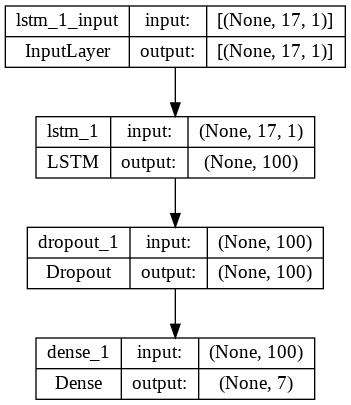

In [ ]:
from sklearn import preprocessing
from numpy import concatenate
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding, TimeDistributed, Dropout
from keras.utils.vis_utils import plot_model

dataset = pd.read_csv('featureVector.csv', header=0)
val = dataset.values
val=val.astype('float32')
val = np.nan_to_num(val)

X = val[:,:17]
Y = val[:,17]


X = np.reshape(X, (X.shape[0], X.shape[1], 1))

model = Sequential()
model.add(LSTM(100, input_shape=(17, 1)))
model.add(Dropout(0.3))
model.add(Dense(7,activation='softmax')) #7 class classification.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.fit(X, Y, epochs=5, batch_size=32, validation_split = 0.2, verbose=1)

print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from sklearn_crfsuite import CRF
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn_crfsuite.metrics import flat_classification_report

class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["Word"].values.tolist(), s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence id").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

data = pd.read_csv("taggedData.csv")
data = data.fillna(method="ffill")
getter = SentenceGetter(data)
sentences = getter.sentences

def word2features(sent, i):
    word = sent[i][0]
    
    features = {
        'bias': 1.0,
        'word': word,
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isdigit()': word.isdigit(),
        'word.isletter()':bool(re.match("^[\u0900-\u097F]+$",word)),
        'word.isAlpha()': bool(re.match("^[\u0900-\u097F0-9]+$",word)),
    }
    if i > 0:
        word1 = sent[i-1][0]
        features.update({
            '-1:word': word1,
            '-1:word.isdigit()': word1.isdigit(),
            '-1:word.isletter()': bool(re.match("^[\u0900-\u097F]+$",word1)),
            '-1:word.isAlpha()': bool(re.match("^[\u0900-\u097F0-9]+$",word1)),
        })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        word1 = sent[i+1][0]
        features.update({
            '+1:word': word1,
            '+1:word.isdigit()': word1.isdigit(),
            '+1:word.isletter()': bool(re.match("^[\u0900-\u097F]+$",word1)),
            '+1:word.isAlpha()': bool(re.match("^[\u0900-\u097F0-9]+$",word1)),
        })
    else:
        features['EOS'] = True
    return features

def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, label in sent]

def sent2tokens(sent):
    return [token for token, label in sent]

X = [sent2features(s) for s in sentences]
y = [sent2labels(s) for s in sentences]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
import pycrfsuite
trainer = pycrfsuite.Trainer(verbose=True)

# Submit training data to the trainer
for xseq, yseq in zip(X_train, y_train):
    trainer.append(xseq, yseq)

# Set the parameters of the model
trainer.set_params({
    # coefficient for L1 penalty
    'c1': 0.1,

    # coefficient for L2 penalty
    'c2': 0.01,  

    # maximum number of iterations
    'max_iterations': 200,

    # whether to include transitions that
    # are possible, but not observed
    'feature.possible_transitions': True
})

# Provide a file name as a parameter to the train function, such that
# the model will be saved to the file when training is finished
trainer.train('crf.model')

Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 2367
Seconds required: 0.037

L-BFGS optimization
c1: 0.100000
c2: 0.010000
num_memories: 6
max_iterations: 200
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

***** Iteration #1 *****
Loss: 423.696179
Feature norm: 1.000000
Error norm: 276.068494
Active features: 2366
Line search trials: 1
Line search step: 0.000656
Seconds required for this iteration: 0.001

***** Iteration #2 *****
Loss: 387.502377
Feature norm: 1.216550
Error norm: 71.728457
Active features: 2297
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.001

***** Iteration #3 *****
Loss: 382.451171
Feature norm: 1.276345
Error norm: 52.634244
Active features: 2322
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0

In [ ]:
tagger = pycrfsuite.Tagger()
tagger.open('crf.model')
y_pred = [tagger.tag(xseq) for xseq in X_test]


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Create a mapping of labels to indices
labels = {'I-LOCATION':6,'B-ORGANIZATION':5,'I-PERSON':4, 'O':3,'B-PERSON':2, 'I-ORGANIZATION':1, 'B-LOCATION':0}

# Convert the sequences of tags into a 1-dimensional array
predictions = np.array([labels[tag] for row in y_pred for tag in row])
truths = np.array([labels[tag] for row in y_test for tag in row])

# Print out the classification report
print(classification_report(truths, predictions,target_names=['I-LOCATION','B-ORGANIZATION','I-PERSON', 'O','B-PERSON', 'I-ORGANIZATION', 'B-LOCATION']))

ValueError: ignored